<a href="https://colab.research.google.com/github/gurarpitzz/Exploring-APIs-/blob/main/handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#FETCHING DATA SET
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784')



In [3]:
x,y= mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

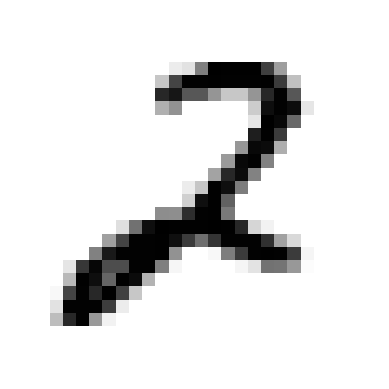

In [7]:

sm_digit = x.iloc[36001]

# Convert the Series to a NumPy array and then reshape
sm_digit_image = sm_digit.values.reshape(28, 28)
plt.imshow(sm_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

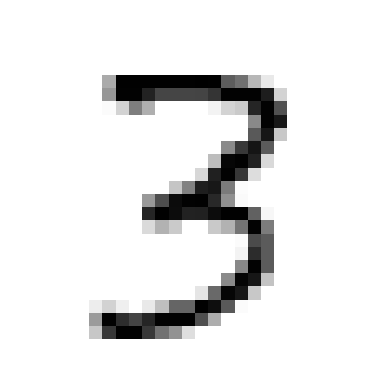

In [36]:
sm_digit = x.iloc[36005]

sm_digit_image = sm_digit.values.reshape(28, 28)
plt.imshow(sm_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

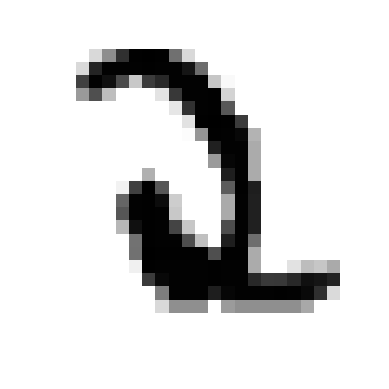

In [37]:
sm_digit = x.iloc[400]

# Convert the Series to a NumPy array and then reshape
sm_digit_image = sm_digit.values.reshape(28, 28)
plt.imshow(sm_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [38]:
y[400]

'2'

In [8]:
y[36001]

'2'

In [9]:
x_train, x_test= x[:60000], x[60000:]

In [10]:
y_train, y_test= y[:60000], y[60000:]

# TO TRAIN THE MODEL SO THAT ANY UNEXPECTED OCCURENCE DOES NOT HAPPEN DURING TEST RUN WE SHUFFLE THE DATA VIA NUMPY.

In [11]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

# Creating a 2 detectory

In [12]:
y_train= y_train.astype(np.int8)
y_test= y_test.astype(np.int8)

y_train_2= (y_train==2)
y_test_2= (y_test==2)



In [16]:
y_train

,class
14402,0
34209,8
41507,3
59216,5
42349,0
...,...
15324,6
6361,7
13001,1
29234,9


In [13]:
y_train_2.array

<NumpyExtensionArray>
[False, False, False, False, False, False, False, False, False, False,
 ...
 False, False, False, False, False, False, False, False, False, False]
Length: 60000, dtype: bool

In [14]:
y_test_2.array

<NumpyExtensionArray>
[False,  True, False, False, False, False, False, False, False, False,
 ...
 False, False, False, False, False,  True, False, False, False, False]
Length: 10000, dtype: bool

In [18]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [19]:
clf.predict([sm_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [22]:
from sklearn.model_selection import cross_val_score #cross validating the data to increase the accuracy
a= cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

In [23]:
a.mean()# given with the mean if 0.979 , it means that our model has 0.979 (98%) accuracy

0.9791500000000001

# MAKE LINEAR MODEL WITH NOT 2

In [26]:
y_train= y_train.astype(np.int8)
y_test= y_test.astype(np.int8)

y_train_not2= (y_train!=2)
y_test_not2= (y_test!=2)

In [27]:
y_test_not2.array

<NumpyExtensionArray>
[ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
 ...
  True,  True,  True,  True,  True, False,  True,  True,  True,  True]
Length: 10000, dtype: bool

In [28]:
y_test_not2.array

<NumpyExtensionArray>
[ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
 ...
  True,  True,  True,  True,  True, False,  True,  True,  True,  True]
Length: 10000, dtype: bool

In [29]:
from sklearn.linear_model import LogisticRegression
clf_new= LogisticRegression(tol=0.1)
clf_new.fit(x_train, y_train_not2)

LogisticRegression(tol=0.1)

In [30]:
clf_new.predict([sm_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [31]:
from sklearn.model_selection import cross_val_score #cross validating the data to increase the accuracy
a= cross_val_score(clf_new, x_train, y_train_not2, cv=3, scoring="accuracy")

In [32]:
a.mean()

0.9791500000000001